##基礎演習S 後半第2回

NE21-1228F
鈴木　拓己

### Ex.2-7　科目間の類似性
##### 準備  
1. 予め「NE2022.zip」をセッションストレージに（手動）アップロード．以下はスクリプトで
1. セッションストレージ内でzipを解凍（シラバス入りの「NE2022」フォルダ生成）
1. セッションストレージ内に「dat」フォルダを作成し，「NE2022」内の３つの基礎演習とすべての「卒業演習１」のシラバスファイル，そして「テキスト処理」を「dat」内にコピー
1. 名詞，形容詞，動詞を品詞とする文書ターム行列を求め，列名の「.txt」部分を削除
1. 文書ターム行列の行名が，パンクチュエーション，アルファベット1文字，数字である行を削除
1. コサイン類似度を計算し，3つの基礎演習別に類似度が最大の科目と最小の（基礎演習以外の）科目を抽出する
1. 前問で抽出した6科目（重複あり得る）について，そのシラバスと3基礎演習の類似度を積み上げ棒グラフで表現する
1. 抽出した6科目（重複あり得る）間の類似度を比較したい．各科目について，科目間の類似度が最大の科目と最小の科目，およびその類似度の値をそれぞれ求める


In [3]:
#[2]
system("apt -y install zip && unzip NE2022.zip")

In [4]:
#[3]
dn <- "dat"
dir.create(dn)
fn <- c("32140","32556","32244","32452","32454","32456","32458","32460","32462","32464","32466","32468","32470","32472"
,"32474","32476","32478","32480","32482","32484","32486","32488","32490","32492","32494","32496","32498","32500","32596")
fn1 <- paste0(dn, "/", fn , ".txt")
fn2 <- paste0("/content/NE2022/", fn ,".txt")
for (i in 1:length(fn)) write(readLines(fn2[i]), fn1[i])
# G.Colab.の左の「ファイル」メニューを開き「更新」アイコンを押して作ったディレクトリを確認せよ

In [31]:
#[4]
install.packages("stringr")
library(stringr)
dtm <- docMatrix("dat", minFreq = 3, pos = c("名詞", "形容詞", "動詞"))
colnames(dtm) <- colnames(dtm) %>% str_replace(".txt", "")
head(dtm,5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



file = dat/32140.txt
file = dat/32244.txt
file = dat/32452.txt
file = dat/32454.txt
file = dat/32456.txt
file = dat/32458.txt
file = dat/32460.txt
file = dat/32462.txt
file = dat/32464.txt
file = dat/32466.txt
file = dat/32468.txt
file = dat/32470.txt
file = dat/32472.txt
file = dat/32474.txt
file = dat/32476.txt
file = dat/32478.txt
file = dat/32480.txt
file = dat/32482.txt
file = dat/32484.txt
file = dat/32486.txt
file = dat/32488.txt
file = dat/32490.txt
file = dat/32492.txt
file = dat/32494.txt
file = dat/32496.txt
file = dat/32498.txt
file = dat/32500.txt
file = dat/32556.txt
file = dat/32596.txt
Term Document Matrix includes 2 information rows! 
whose names are [[LESS-THAN-3]] and [[TOTAL-TOKENS]]
if you remove these rows, run
result[ rownames(result) !=  "[[LESS-THAN-3]]" , ]
result[ rownames(result) !=  "[[TOTAL-TOKENS]]" , ]


     docs
terms 32140 32244 32452 32454 32456 32458 32460 32462 32464 32466 32468 32470
   -      0     0     0     0     0     0     0     0     4     0     0     0
   －     5     0     0     0     0     0     0     0     0     0     0     0
   ,      0     0     0     0     0     0     0    11     0     0     0     0
   :      0     0     0     0     0     0     0     0     4     0     0     0
   .      4    17     0     0     0     0     0     0     0     0    15     0
     docs
terms 32472 32474 32476 32478 32480 32482 32484 32486 32488 32490 32492 32494
   -      0     0     0     0     0     0     0     0     0     0     0     0
   －     0     0     0     0     0     0     0     0     0     0     0     0
   ,      0     0     0     0     0     0     0     0     0     4     0     0
   :      0     0     0     0     0     0     0     0     0     0     0     0
   .      0     0     0     0     0     0     0     0    15     0     0     0
     docs
terms 32496 32498 32500 32556 32596


In [102]:
#[5]
d <- grep("[[:punct:]]",rownames(dtm))
if(length(d) != 0) dtm <- dtm[-d,]
d <- grep("^[Ａ-ＺA-Zａ-ｚa-z]$",rownames(dtm),perl=TRUE)
if(length(d) != 0) dtm <- dtm[-d,]
d <- which(rownames(dtm) %in% c("０","１","２","３","４","５","６","７","８","９","0","1","2","3","4","5","6","7","8","9"))
if(length(d) != 0) dtm <- dtm[-d,]

In [103]:
#[6]
# パッケージ
install.packages('lsa')
library(lsa)
data <- cosine(as.matrix(dtm[,])); data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,32140,32244,32452,32454,32456,32458,32460,32462,32464,32466,⋯,32486,32488,32490,32492,32494,32496,32498,32500,32556,32596
32140,1.0000000,0.3868478,0.2747367,0.1944725,0.1788447,0.1658324,0.2553835,0.3247330,0.3506240,0.3129687,⋯,0.2960385,0.3195120,0.6234531,0.2100639,0.2741456,0.2824937,0.2628567,0.2574846,0.4484846,0.3273764
32244,0.3868478,1.0000000,0.4793720,0.3769175,0.3279865,0.2675490,0.5291543,0.6803345,0.5814632,0.3684282,⋯,0.4700393,0.4464843,0.5774388,0.3026118,0.3312295,0.4941860,0.4989578,0.5261236,0.6559481,0.5360337
32452,0.2747367,0.4793720,1.0000000,0.5852684,0.7029782,0.6865075,0.5067934,0.5929391,0.4274707,0.5177773,⋯,0.5166654,0.2187431,0.3699104,0.6398159,0.4592274,0.4553730,0.3720517,0.6575189,0.4733842,0.2815573
32454,0.1944725,0.3769175,0.5852684,1.0000000,0.6347952,0.6489549,0.3733489,0.5676306,0.3396863,0.3891111,⋯,0.4352575,0.1811507,0.2724032,0.6378648,0.4265132,0.4017697,0.2625892,0.5370948,0.3317012,0.2728023
32456,0.1788447,0.3279865,0.7029782,0.6347952,1.0000000,0.8946392,0.3513178,0.5136655,0.2453976,0.5005127,⋯,0.4983260,0.1290701,0.2631328,0.7702819,0.5879274,0.4368710,0.2877830,0.5972923,0.3017342,0.1763114
32458,0.1658324,0.2675490,0.6865075,0.6489549,0.8946392,1.0000000,0.3292217,0.5067780,0.2465628,0.4617044,⋯,0.5497768,0.1555320,0.2197693,0.8060277,0.5161877,0.4333820,0.2954787,0.5837764,0.2583189,0.1997342
32460,0.2553835,0.5291543,0.5067934,0.3733489,0.3513178,0.3292217,1.0000000,0.5787756,0.4753500,0.4153426,⋯,0.4714591,0.2468677,0.4031024,0.3167126,0.4040730,0.4263897,0.2907039,0.4623820,0.5692839,0.3506530
32462,0.3247330,0.6803345,0.5929391,0.5676306,0.5136655,0.5067780,0.5787756,1.0000000,0.6983557,0.4426511,⋯,0.5395702,0.3524186,0.5262225,0.5021690,0.4911209,0.4864264,0.4103298,0.6917025,0.5801781,0.4028230
32464,0.3506240,0.5814632,0.4274707,0.3396863,0.2453976,0.2465628,0.4753500,0.6983557,1.0000000,0.4258861,⋯,0.3829827,0.3741499,0.4855612,0.2594851,0.3260229,0.4132015,0.5268670,0.6496708,0.5457765,0.3855202
32466,0.3129687,0.3684282,0.5177773,0.3891111,0.5005127,0.4617044,0.4153426,0.4426511,0.4258861,1.0000000,⋯,0.4099831,0.3340529,0.2819307,0.4542297,0.4655630,0.4070014,0.4122832,0.4942193,0.4447754,0.2930230


In [104]:
max_min_6 <- c()
names <- rownames(data) #列の名前

ndata <- data[order(data[,"32140"], decreasing=T),]
nnames <- rownames(ndata)
max_min_6 <- c(max_min_6,nnames[2]);max_min_6[1]
ndata[2,"32140"]

ndata <- data[order(data[,"32556"], decreasing=T),]
nnames <- rownames(ndata)
max_min_6 <- c(max_min_6,nnames[2]);max_min_6[2]
ndata[2,"32556"]

ndata <- data[order(data[,"32244"], decreasing=T),]
nnames <- rownames(ndata)
max_min_6 <- c(max_min_6,nnames[2]);max_min_6[3]
ndata[2,"32244"]

基礎演習S_min <- which.min(data[,"32140"])
基礎演習D_min <- which.min(data[,"32556"])
基礎演習DS_min <- which.min(data[,"32244"])

max_min_6 <- c(max_min_6,names[which.min(data[,"32140"])]);max_min_6[4]
data[基礎演習S_min,"32140"]
max_min_6 <- c(max_min_6,names[which.min(data[,"32556"])]);max_min_6[5]
data[基礎演習D_min,"32556"]
max_min_6 <- c(max_min_6,names[which.min(data[,"32244"])]);max_min_6[6]
data[基礎演習DS_min,"32244"]

[1] "32490"

[1] 0.6234531

[1] "32244"

[1] 0.6559481

[1] "32462"

[1] 0.6803345

[1] "32458"

[1] 0.1658324

[1] "32458"

[1] 0.2583189

[1] "32458"

[1] 0.267549

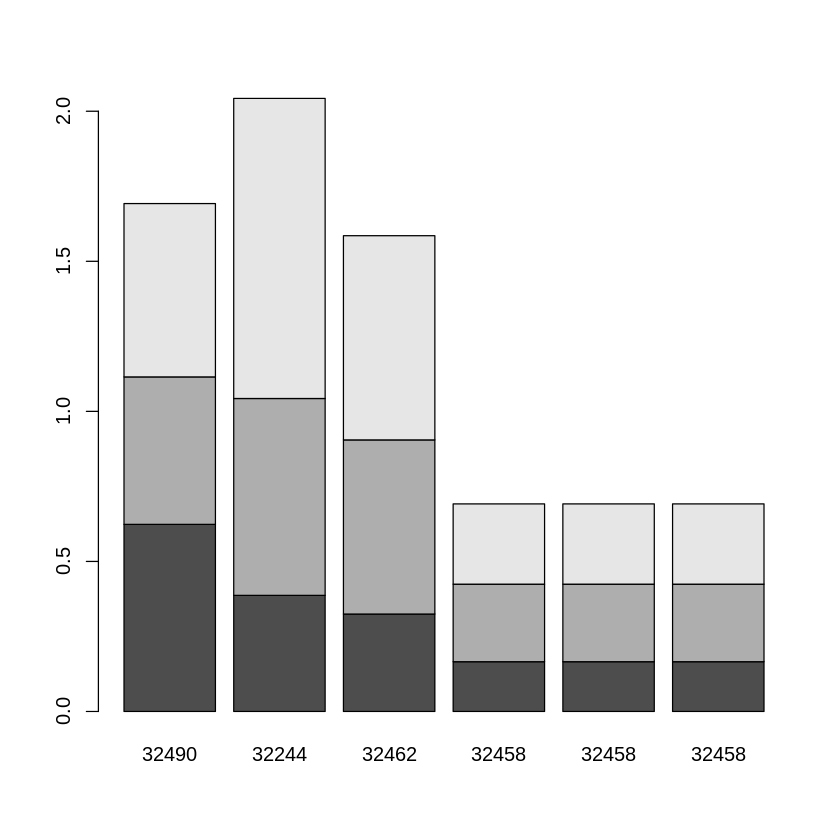

In [105]:
x <- c()
for(i in 1:length(max_min_6)){
    plotdata <- c()
    plotdata <- c(plotdata,data[max_min_6[i],"32140"])
    plotdata <- c(plotdata,data[max_min_6[i],"32556"])
    plotdata <- c(plotdata,data[max_min_6[i],"32244"])
    x <- cbind(x,plotdata)
}
barplot(x, legend = TRUE,names.arg=max_min_6)


In [106]:
max_min_6_data <- data[max_min_6,max_min_6]
max_min_6_data
data <- cosine(as.matrix(max_min_6_data[,])); data

,32490,32244,32462,32458,32458,32458
32490,1.0000000,0.5774388,0.5262225,0.2197693,0.2197693,0.2197693
32244,0.5774388,1.0000000,0.6803345,0.2675490,0.2675490,0.2675490
32462,0.5262225,0.6803345,1.0000000,0.5067780,0.5067780,0.5067780
32458,0.2197693,0.2675490,0.5067780,1.0000000,1.0000000,1.0000000
32458,0.2197693,0.2675490,0.5067780,1.0000000,1.0000000,1.0000000
32458,0.2197693,0.2675490,0.5067780,1.0000000,1.0000000,1.0000000


,32490,32244,32462,32458,32458,32458
32490,1.0000000,0.8991324,0.8477202,0.5340862,0.5340862,0.5340862
32244,0.8991324,1.0000000,0.9218798,0.5916887,0.5916887,0.5916887
32462,0.8477202,0.9218798,1.0000000,0.7985063,0.7985063,0.7985063
32458,0.5340862,0.5916887,0.7985063,1.0000000,1.0000000,1.0000000
32458,0.5340862,0.5916887,0.7985063,1.0000000,1.0000000,1.0000000
32458,0.5340862,0.5916887,0.7985063,1.0000000,1.0000000,1.0000000


In [134]:
names <- rownames(max_min_6_data) #列の名前
max_data_num <- c()  #各科目について,科目間の類似度が最大の科目(番号)
max_data <- 0  #各科目について,科目間の類似度が最大の科目の類似度の値
min_data_num <- c() #各科目について,科目間の類似度が最小の科目(番号),
min_data <- 1  #各科目について,科目間の類似度が最小の科目の類似度の値


ndata <- data[order(data[,"32490"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32490"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i] ;max_min_data
ndata[i,"32490"]

max_data <- ndata[i,"32490"]
max_data_num <- c("32490",max_min_data)


min_data <- ndata[6,"32490"]
min_data_num <- c("32490",nnames[6])


ndata <- data[order(data[,"32244"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32244"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i]; max_min_data
ndata[i,"32244"]

if(max_data < ndata[i,"32244"]){
  max_data <- ndata[i,"32244"]
  max_data_num[1] <- "32244"
  max_data_num[2] <- max_min_data
}

if(min_data > ndata[6,"32244"]){
  min_data <- ndata[6,"32244"]
  min_data_num[1] <- "32244"
  min_data_num[2] <- nnames[6]
}

ndata <- data[order(data[,"32462"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32462"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i]; max_min_data
ndata[i,"32462"]

if(max_data < ndata[i,"32462"]){
  max_data <- ndata[i,"32462"]
  max_data_num[1] <- "32462"
  max_data_num[2] <- max_min_data
}

if(min_data > ndata[6,"32462"]){
  min_data <- ndata[6,"32462"]
  min_data_num[1] <- "32462"
  min_data_num[2] <- nnames[6]
}

ndata <- data[order(data[,"32458"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32458"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i]; max_min_data
ndata[i,"32458"]

if(max_data < ndata[i,"32458"]){
  max_data <- ndata[i,"32458"]
  max_data_num[1] <- "32458"
  max_data_num[2] <- max_min_data
}

if(min_data > ndata[6,"32458"]){
  min_data <- ndata[6,"32458"]
  min_data_num[1] <- "32458"
  min_data_num[2] <- nnames[6]
}

ndata <- data[order(data[,"32458"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32458"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i]; max_min_data
ndata[i,"32458"]

if(max_data < ndata[i,"32458"]){
  max_data <- ndata[i,"32458"]
  max_data_num[1] <- "32458"
  max_data_num[2] <- max_min_data
}

if(min_data > ndata[6,"32458"]){
  min_data <- ndata[6,"32458"]
  min_data_num[1] <- "32458"
  min_data_num[2] <- nnames[6]
}

ndata <- data[order(data[,"32458"], decreasing=T),]
nnames <- rownames(ndata)
i <- 2;
while(ndata[i,"32458"] == 1){
  i = i + 1;
}
max_min_data <- nnames[i]; max_min_data
ndata[i,"32458"]

if(max_data < ndata[i,"32458"]){
  max_data <- ndata[i,"32458"]
  min_data_num[1] <- "32458"
  min_data_num[2] <- max_min_data
}

if(min_data > ndata[6,"32458"]){
  min_data <- ndata[6,"32458"]
  min_data_num[1] <- "32458"
  min_data_num[2] <- nnames[6]
}

[1] "32244"

[1] 0.8991324

[1] "32462"

[1] 0.9218798

[1] "32244"

[1] 0.9218798

[1] "32462"

[1] 0.7985063

[1] "32462"

[1] 0.7985063

[1] "32462"

[1] 0.7985063

[1] "32244" "32462"

[1] 0.9218798

[1] "32490" "32458"

[1] 0.5340862

In [135]:
max_data_num # 最大値の科目
max_data #最大値
min_data_num # 最小値の科目
min_data #最小値

[1] "32244" "32462"

[1] 0.9218798

[1] "32490" "32458"

[1] 0.5340862

###<コメント>
32244と32462や32244と32490や32462と32490は特に類似度が高かった。基礎演習との最小値[6]は全て32458であったためこの科目が類似性が基礎演習と特に低いことが推測できる。も0.5を超えていたので基礎演習の科目との類似性が高い分他の科目との高いことが理解できた。よってAに対して類似性が高いBはBの中でも類似性はあると推測できる。

In [2]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

